In [82]:
import numpy
import math
import numpy as np
from frc3223_azurite.data import read_csv
from matplotlib import pyplot

# Savitzky-Golay filtering 
# stolen from https://dsp.stackexchange.com/a/9512

def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = len(x) // 2        
    a = x - x[mid]
    expa = lambda x: list(map(lambda i: i**x, a)  )  
    A = np.r_[list(map(expa, range(0,m+1)))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]

def smooth(x, y, size=5, order=2, deriv=0):

    if deriv > order:
        raise Exception( "deriv must be <= order")

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in range(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv > 1:
        result *= math.factorial(deriv)

    return result

def eulers(ts, acs, d0, v0):
    ds = numpy.zeros(shape=ts.shape)
    vs = numpy.zeros(shape=ts.shape)
    vs[0] = v0
    ds[0] = d0
    for i in range(1, len(ts)):
        dt = (ts[i]-ts[i-1])
        vs[i] = vs[i-1] + acs[i] * dt
        ds[i] = ds[i-1] + vs[i-1] * dt
        
    return ds, vs
    

In [83]:
datas = read_csv("data.csv")
ts = datas['t']
ds = datas['d']
vs = (ds[1:] - ds[:-1]) / (ts[1:] - ts[:-1])
vs2 = smooth(ts, ds, deriv=1)
acs = (vs[1:] - vs[:-1]) / (ts[2:] - ts[:-2])
acs2 = smooth(ts, ds, deriv=2)

ds2 = numpy.zeros(shape=ds.shape)

ds2, vs3 = eulers(ts[5:], acs2[5:], ds[5], vs2[5])
# n = 6
# ds2[0:n] = ds[0:n]
# vs3 = numpy.zeros(shape=ds.shape)
# vs3[0:n] = vs2[n-1]
# for i in range(n, len(ds)):
#     dt = (ts[i]-ts[i-1])
#     vs3[i] = vs3[i-1] + acs2[i] * dt
#     ds2[i] = ds2[i-1] + vs3[i-1] * dt
#     #print("%s, %s, %s, %s, %s" % (i, ds2[i-1], ds2[i], dt, acs2[i]))

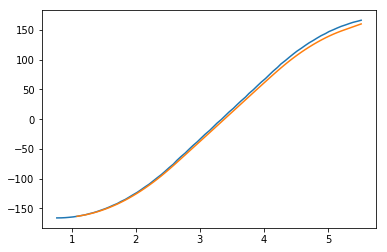

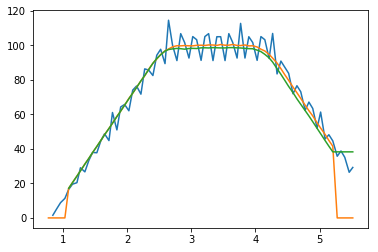

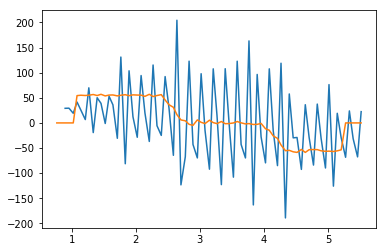

In [84]:
pyplot.plot(ts, ds)
pyplot.plot(ts[5:], ds2)
pyplot.show()
pyplot.plot(ts[1:], vs)
pyplot.plot(ts, vs2)
pyplot.plot(ts[5:], vs3)
pyplot.show()
pyplot.plot(ts[2:], acs)
pyplot.plot(ts, acs2)
pyplot.show()